## Download data

In [1]:
!gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6

/home/server1-ailab/miniconda3/envs/tuong_tf/lib/python3.8/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /home/server1-ailab/Desktop/Tuong/Tensorflow_Tutorial/Machine_Learning/MLP/NonLinear_data.npy
100%|██████████████████████████████████████| 5.57k/5.57k [00:00<00:00, 5.40MB/s]


## Prepare data

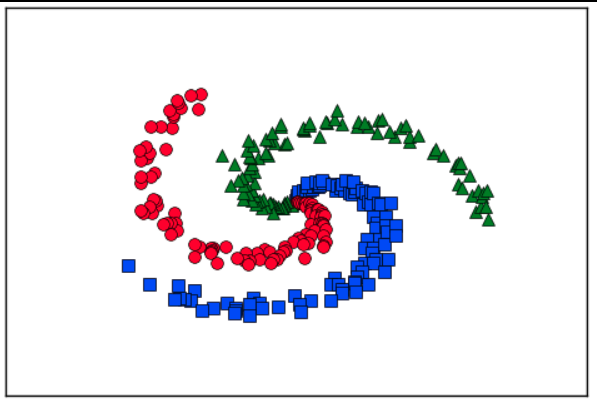

In [3]:
import numpy as np

data_path = "./datasets/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = X.astype(np.float32), labels.astype(np.float32)

## Softmax

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [19]:
num_class = 3

# Create model
SR_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=num_class, input_shape=[2], activation='softmax')
])
##################################################################

SR_model.summary()

# Compile
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=2)
SR_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

# Training
SR_history = SR_model.fit(X, labels, batch_size=X.shape[0], epochs=500)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


2023-05-06 13:30:14.344932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [300,2]
	 [[{{node Placeholder/_10}}]]
2023-05-06 13:30:14.345177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [300]
	 [[{{node Placeholder/_11}}]]


1/1 [==============================] - 0s 361ms/step - loss: 1.2737 - accuracy: 0.1100
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1797 - accuracy: 0.2633
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 1.1051 - accuracy: 0.2933
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0458 - accuracy: 0.3400
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9984 - accuracy: 0.4533
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9603 - accuracy: 0.4833
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9295 - accuracy: 0.5033
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 0.9043 - accuracy: 0.5067
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8836 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.8663 - accuracy: 0.5000
Epoch 11/500
1/1 [==================

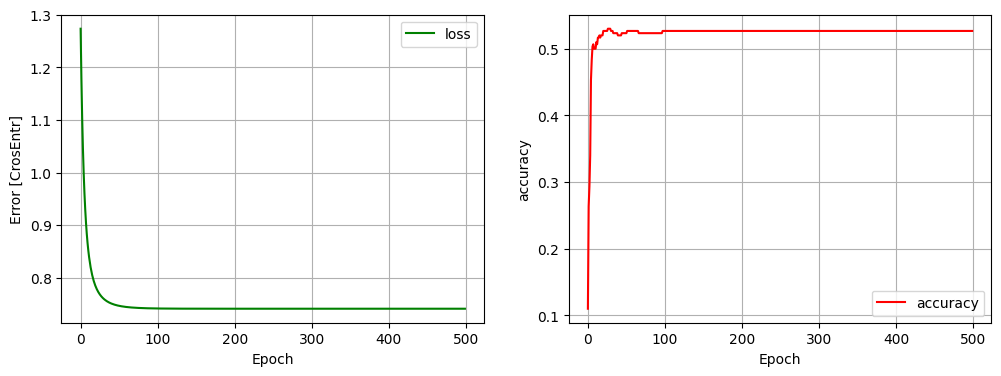

In [20]:

# plt.plot(SR_history.history['val_loss'], label='val_loss')
# plt.ylim([0, 10])
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [21]:
hist = pd.DataFrame(SR_history.history)
hist['epoch'] = SR_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.74124,0.526667,495
496,0.74124,0.526667,496
497,0.74124,0.526667,497
498,0.74124,0.526667,498
499,0.74124,0.526667,499


In [22]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.5299999713897705
Min train loss:  0.741239607334137


## MLP Classification

In [4]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [10]:
num_class = 3

# Create model
MLP_N_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[2], activation='relu'),
    tf.keras.layers.Dense(units=num_class, activation='softmax')
])
##################################################################

MLP_N_model.summary()

# Compile
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=2)
MLP_N_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

# Training
MLP_N_history = MLP_N_model.fit(X, labels, batch_size=X.shape[0], epochs=500)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


2023-05-06 13:44:27.112573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [300]
	 [[{{node Placeholder/_11}}]]
2023-05-06 13:44:27.112859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [300]
	 [[{{node Placeholder/_11}}]]


1/1 [==============================] - 0s 457ms/step - loss: 1.1113 - accuracy: 0.3533
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0093 - accuracy: 0.5667
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9388 - accuracy: 0.5600
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8809 - accuracy: 0.5633
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.8336 - accuracy: 0.5533
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7962 - accuracy: 0.5533
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 0.7679 - accuracy: 0.5700
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7468 - accuracy: 0.5500
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7309 - accuracy: 0.5700
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.7193 - accuracy: 0.5667
Epoch 11/500
1/1 [=============

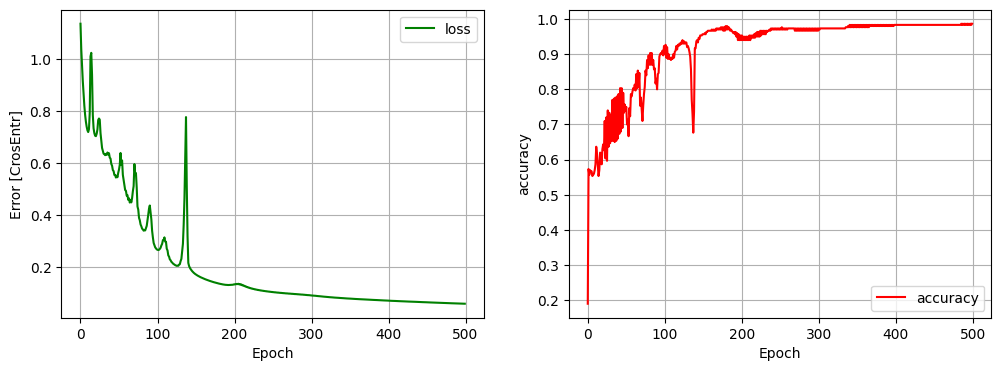

In [6]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_N_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_N_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

In [7]:
hist = pd.DataFrame(MLP_N_history.history)
hist['epoch'] = MLP_N_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.060558,0.986667,495
496,0.060412,0.983333,496
497,0.060390,0.986667,497
498,0.060212,0.983333,498
499,0.060149,0.986667,499


In [8]:
print("Max train acc: ", max(hist['accuracy']))
print("Min train loss: ", min(hist['loss']))

Max train acc:  0.9866666793823242
Min train loss:  0.0601494163274765
